# Set Up 

supervised machine learning 

target var: MentHlth (no. of poor mental hlth. days in the last mo.)

problem type: regression

# Aesthetics

In [4]:
primary_colors = [
    "#9CAF88",  # Sage Green
    "#FFD966",  # Warm Yellow
    "#6D4C41",  # Earthy Brown
    "#D4A5A5",  # Soft Pink
    "#A6D5E5",  # Light Blue
    "#F7EFE2"   # Cream
]

In [6]:
secondary_colors = [
    "#B5CDA3",  # Light Olive Green
    "#E4CDA7",  # Beige Tan
    "#B4A7D6"   # Lavender
]

In [8]:
contrast_colors = [
    "#FF6F61",  # Coral Red
    "#4B3832",  # Deep Espresso Brown
    "#3C6478"   # Slate Blue
]

In [173]:
jon_colors = primary_colors + secondary_colors + contrast_colors

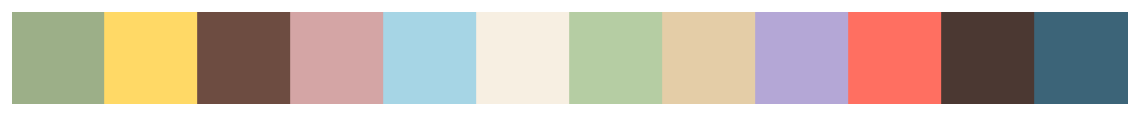

In [175]:
import matplotlib.pyplot as plt 

# Plot the colors as a horizontal bar
fig, ax = plt.subplots(figsize=(len(jon_colors), 1))

# Create a colored bar by plotting rectangles
for idx, color in enumerate(jon_colors):
    ax.add_patch(plt.Rectangle((idx, 0), 1, 1, color=color))

# Set limits and hide axes
ax.set_xlim(0, len(jon_colors))
ax.set_ylim(0, 1)
ax.axis('off')

plt.show()

In [183]:
# Set global font settings to Avenir Next
plt.rcParams['font.family'] = "Avenir"
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24

# Match font weights similar to Helvetica
plt.rcParams['axes.titleweight'] = "medium"  # Avenir's "medium" matches Helvetica's "normal" for titles
plt.rcParams['axes.labelweight'] = "demibold"  # Similar to "bold" in Helvetica, but a little lighter
plt.rcParams['font.weight'] = "light"  # "light" for a subtle, modern touch on general text

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 120  # Slightly higher dpi for clearer detail with Avenir Next

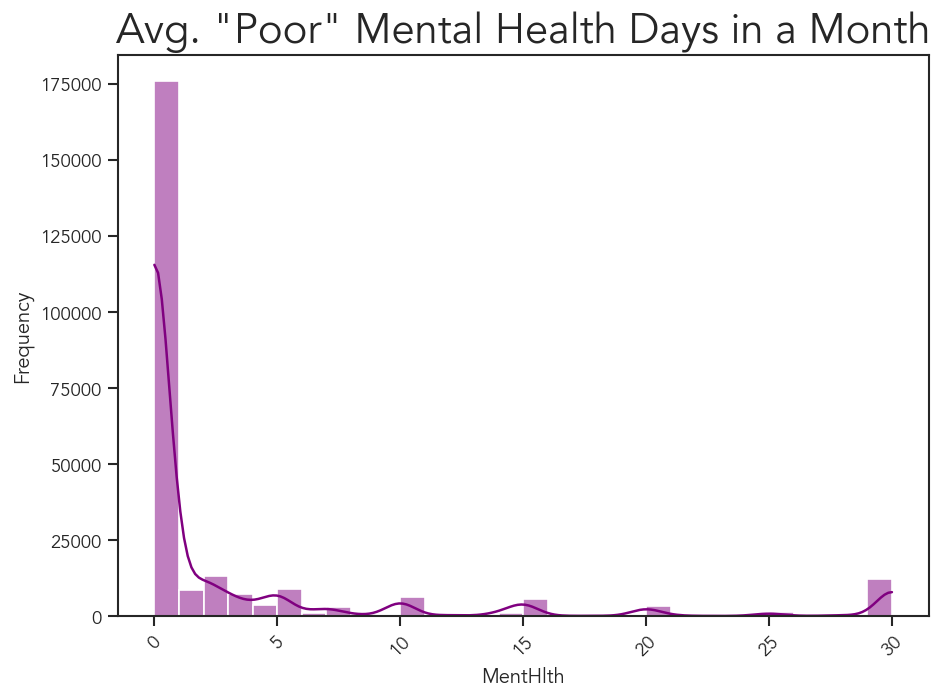

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create the figure and plot
data_column = "MentHlth"
plt.figure(figsize=(8, 6))

# Check if the column is categorical or continuous
if df[data_column].nunique() <= 10:  # Categorical
    sns.countplot(x=data_column, data=df, color="purple")
    plt.title(f'Distribution of {data_column} (Categorical)', fontsize=14)
    plt.ylabel('Count', fontsize=12)
else:  # Continuous
    sns.histplot(df[data_column], kde=True, bins=30, color="purple")
    plt.title(f'Avg. "Poor" Mental Health Days in a Month', fontsize=25)
    plt.ylabel('Frequency', fontsize=12)

# Set common labels and layout adjustments
plt.xlabel(data_column, fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mental.png', transparent=True)  
plt.show()

# DF

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("diabetes.csv")

In [119]:
# adjustments

In [111]:
import numpy as np
df['Diabetes_012'] = np.where(df['Diabetes_012'] > 0, 1, 0)

In [121]:
df['HealthBurdenScore'] = df['PhysHlth'] + df['GenHlth'] + (df['DiffWalk'] * 2)

In [ ]:
del df['Fruits']
del df['Veggies']
del df['PhysActivity']

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int64  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# EDA

In [20]:
df.MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1.,  4.,
        7.,  8., 21., 14., 26., 29., 16., 28., 11., 12., 24., 17., 13.,
       27., 19., 22.,  9., 23.])

fourteen days as frequent mental distress accoding to the CDC
https://www.cdc.gov/ncbddd/disabilityandhealth/features/adults-with-disabilities-mental-distress.html

this aligns with diagnostic criteria for conditions like major depressive disorder

## Distribution Visualizations 

<Figure size 1440x720 with 0 Axes>

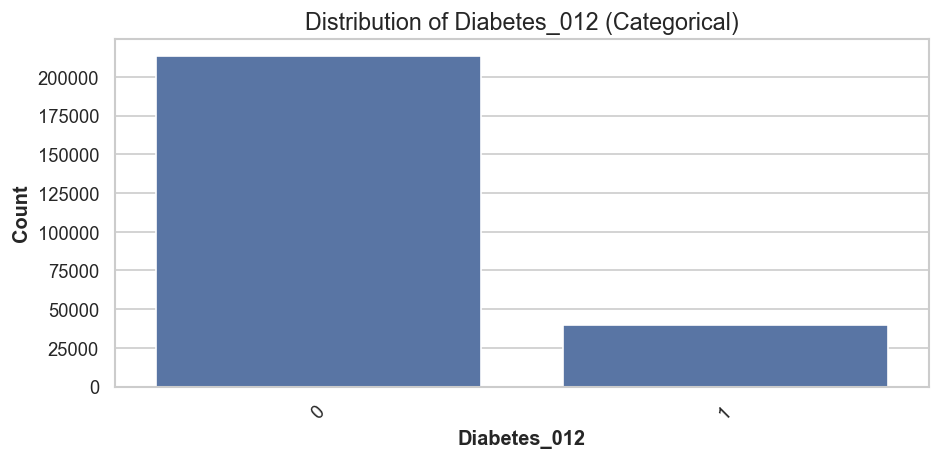

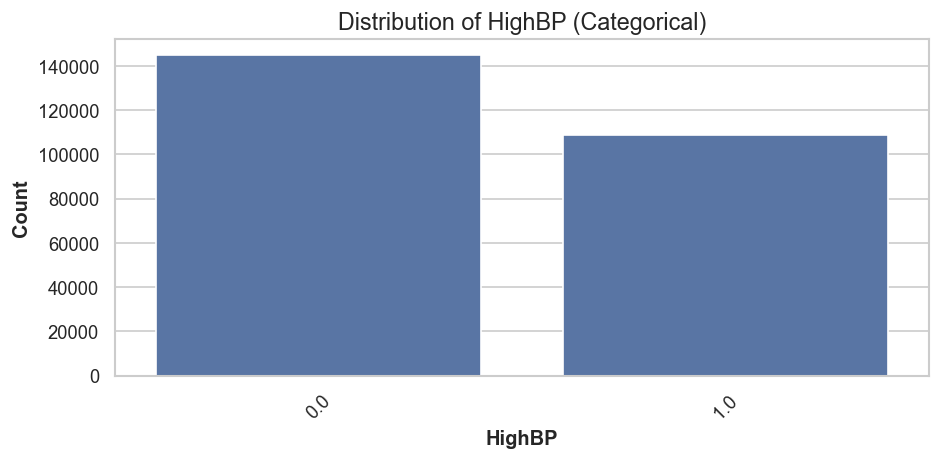

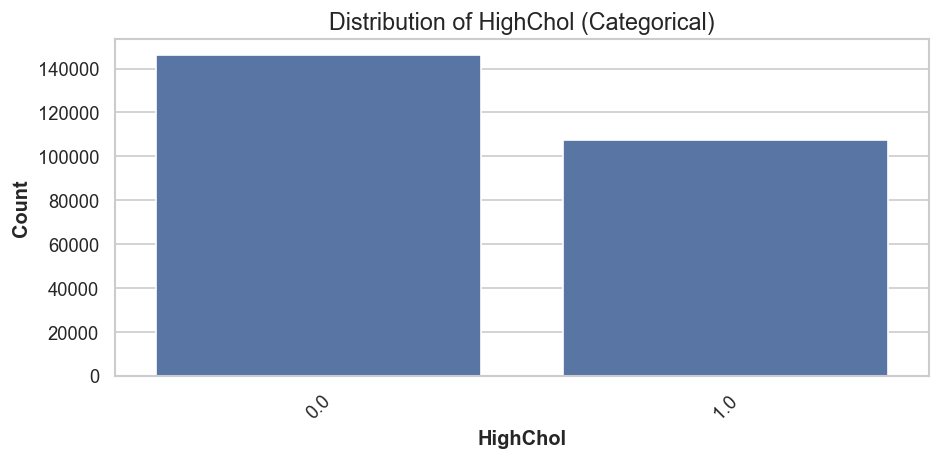

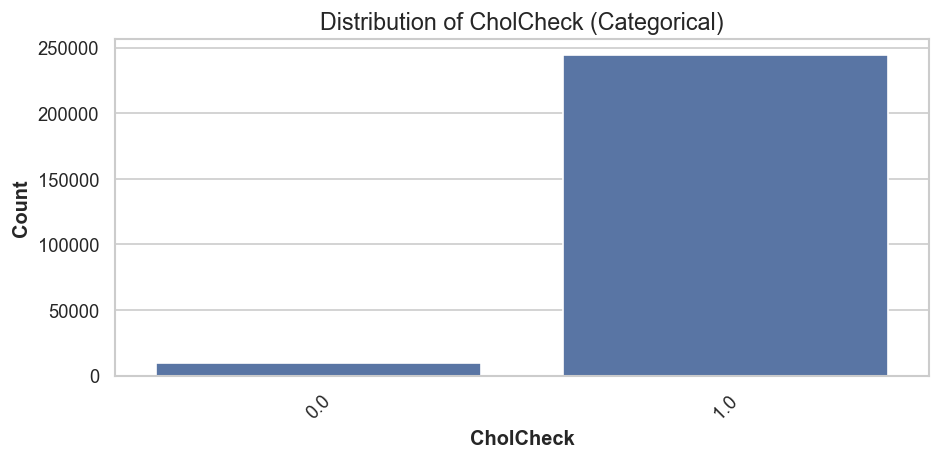

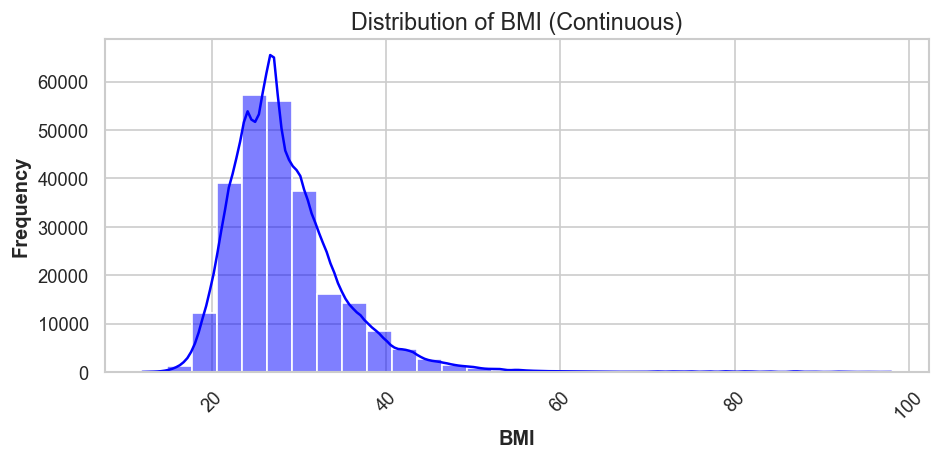

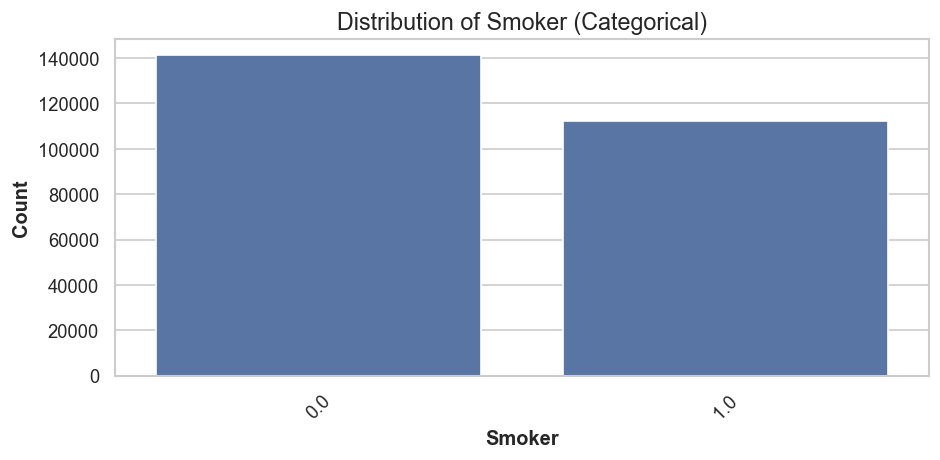

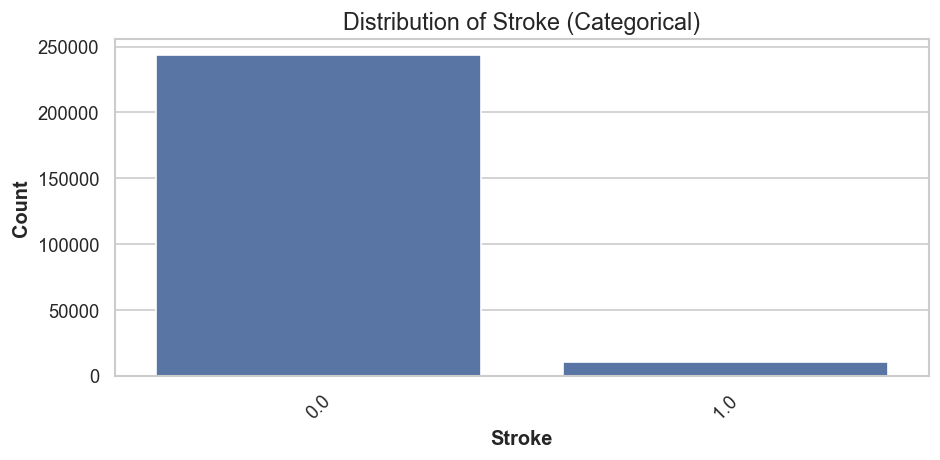

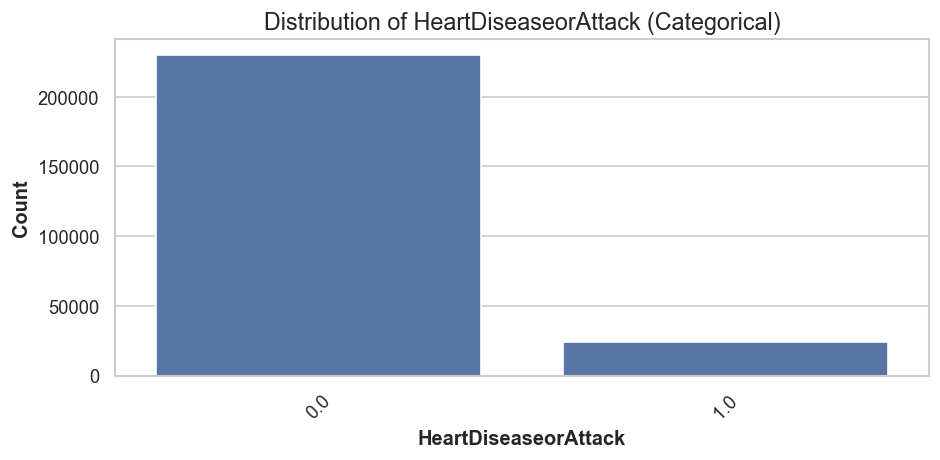

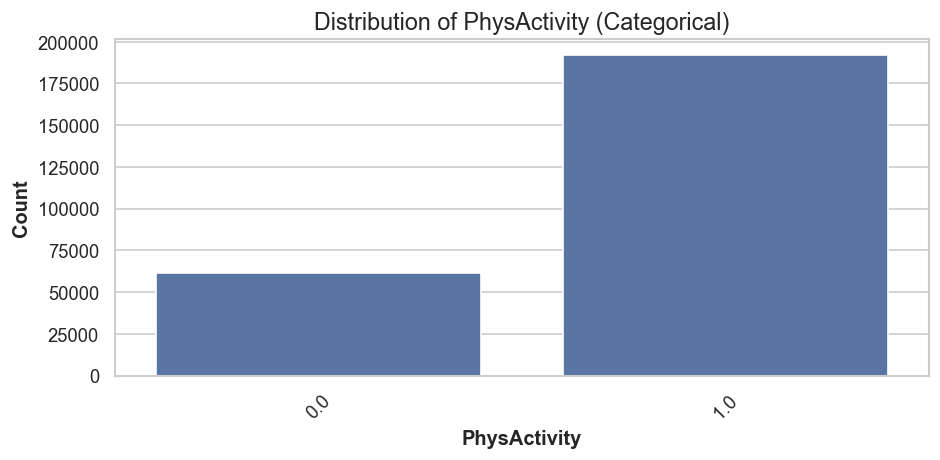

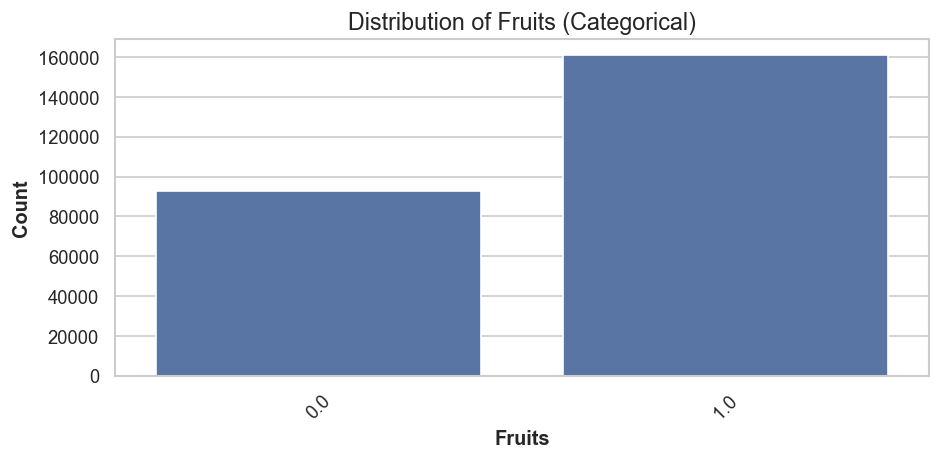

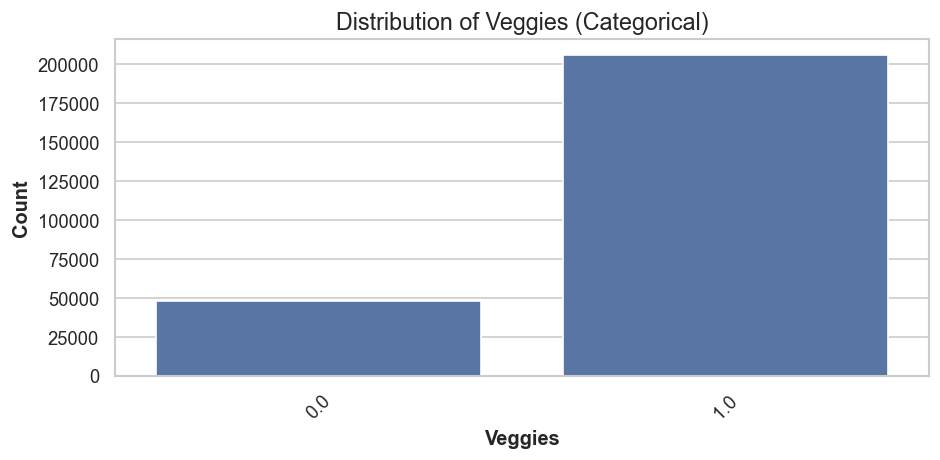

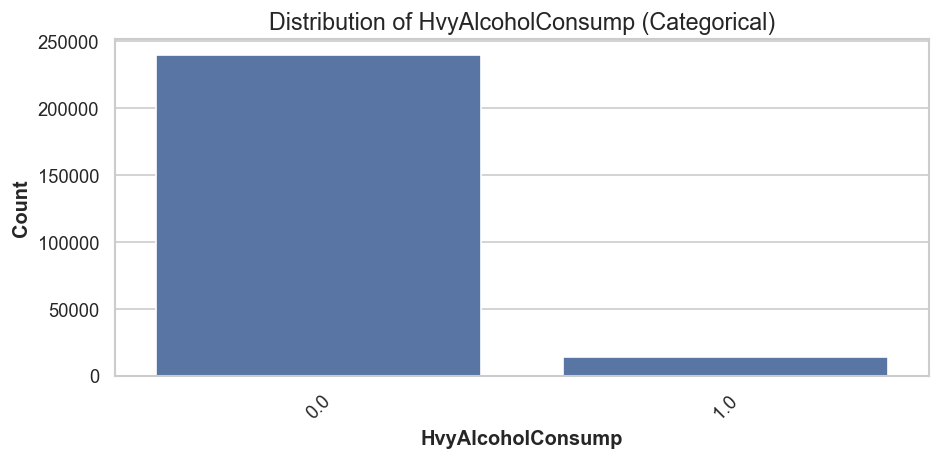

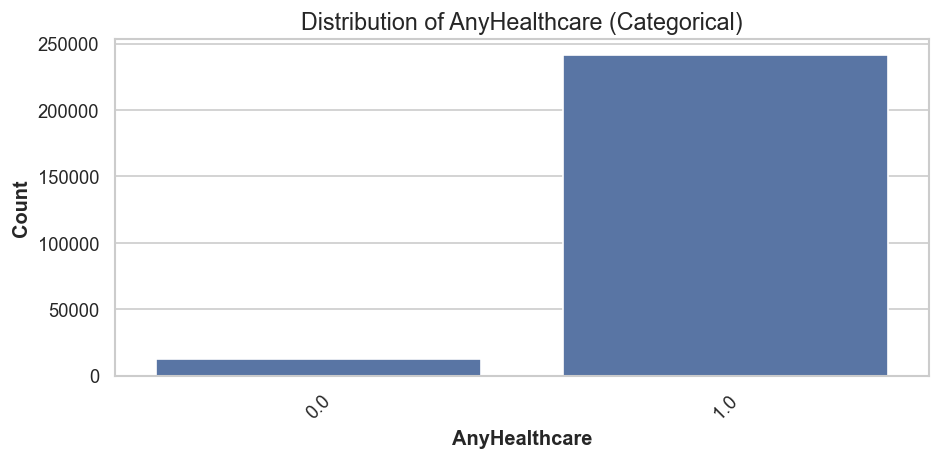

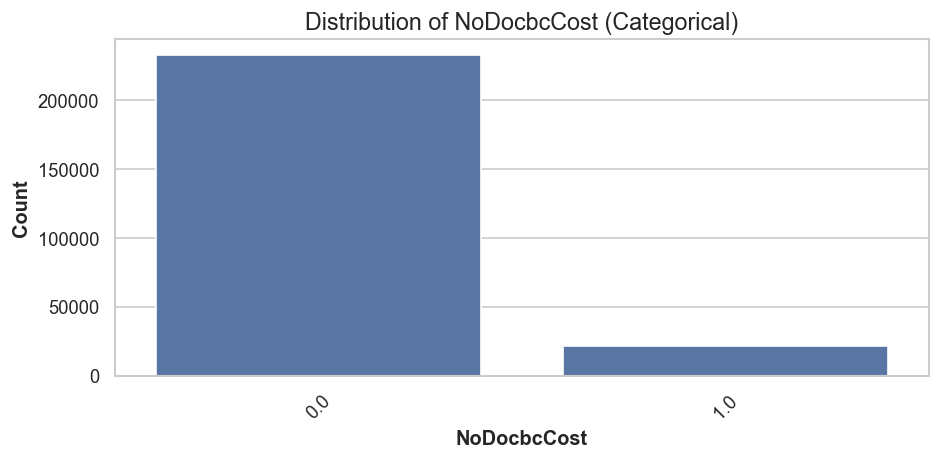

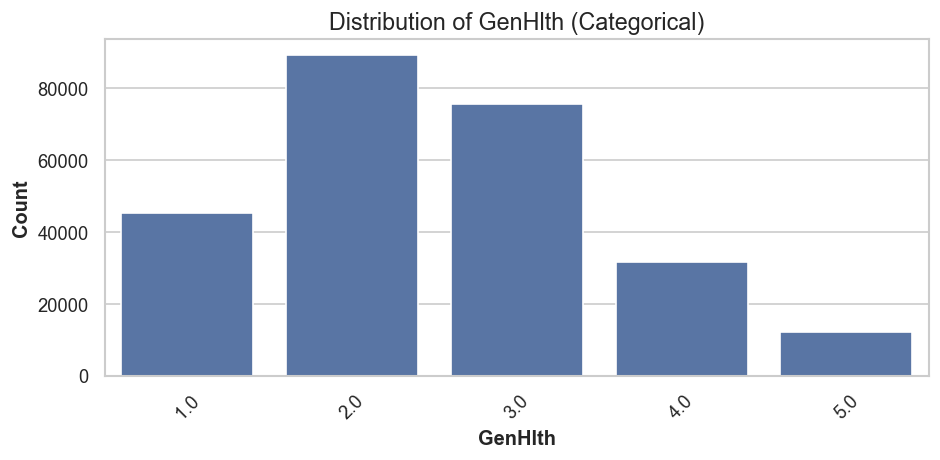

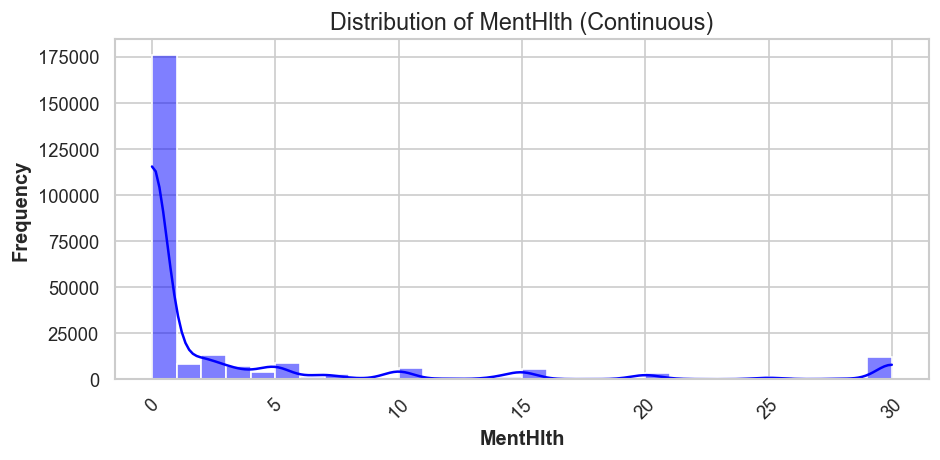

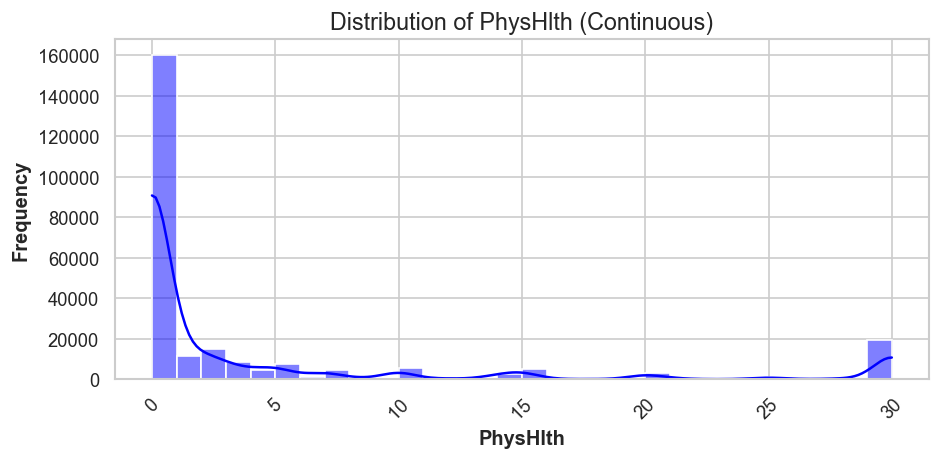

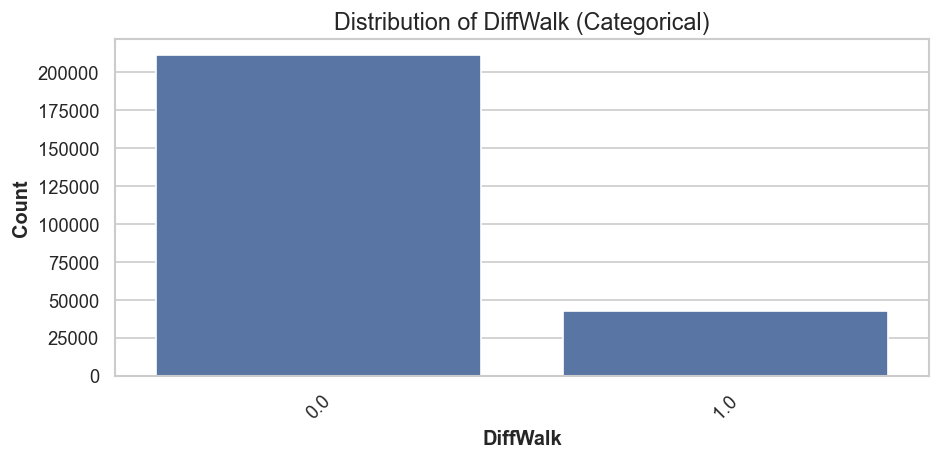

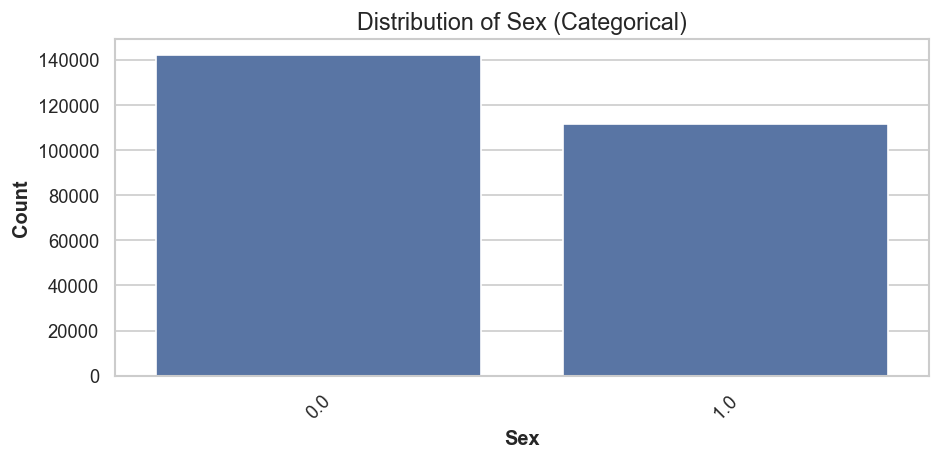

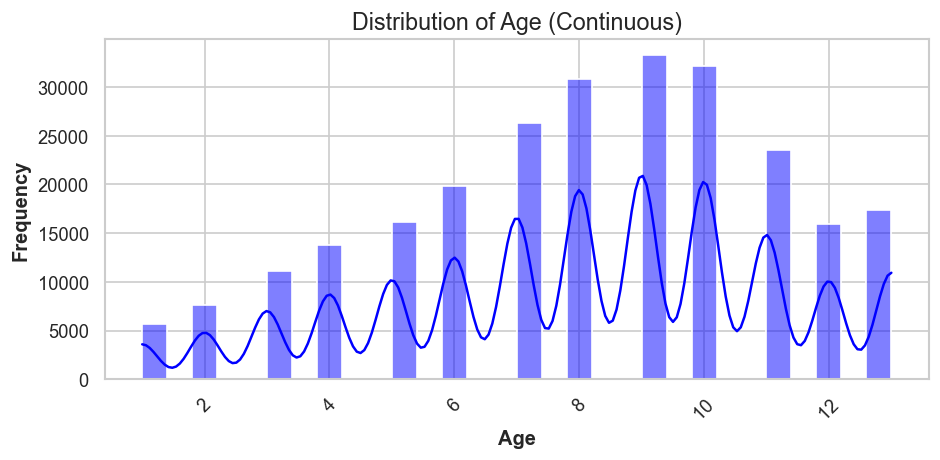

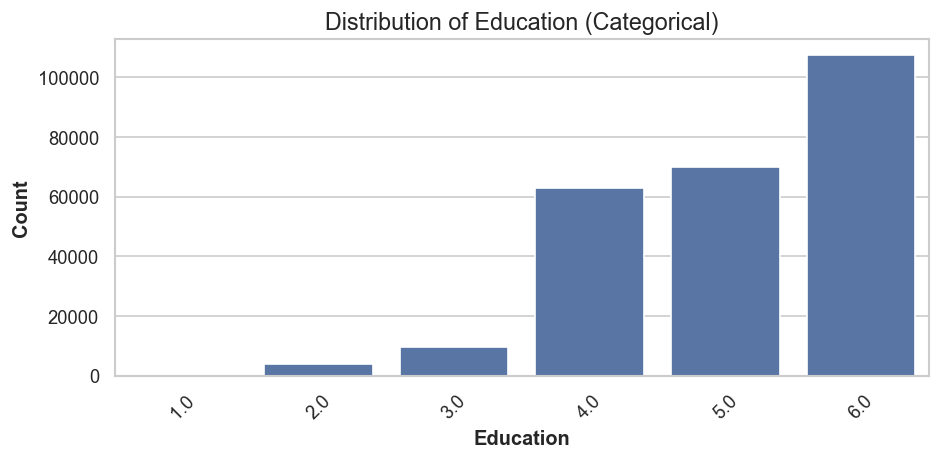

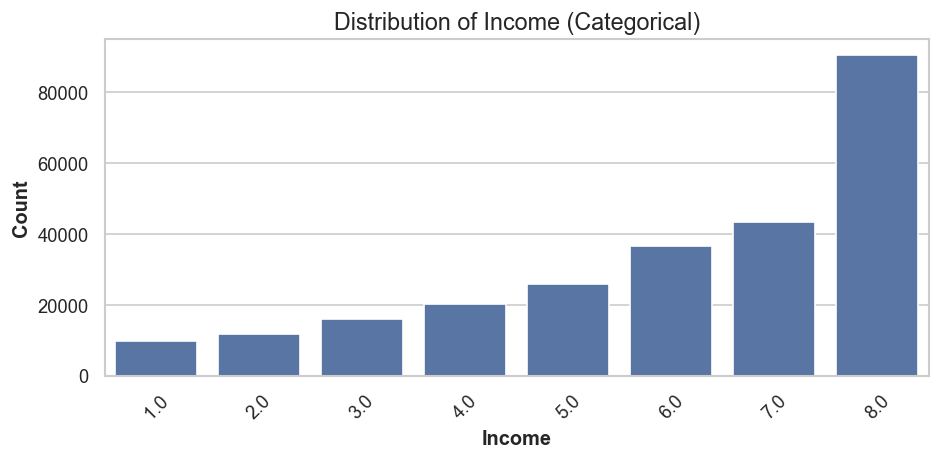

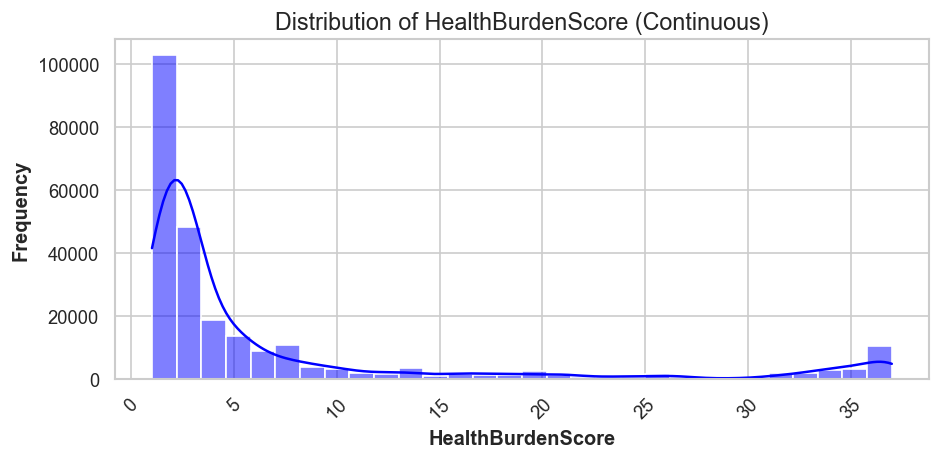

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for col in df.columns:
    plt.figure(figsize=(8, 4))
    
    if df[col].nunique() <= 10:  # Categorical if 10 or fewer unique values
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col} (Categorical)', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
    else:  # Continuous if more than 10 unique values
        sns.histplot(df[col], kde=True, bins=30, color="blue")
        plt.title(f'Distribution of {col} (Continuous)', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [64]:
#import numpy as np
#df['LogMentHlth'] = np.log1p(df['MentHlth'])  # log(1 + x) to handle zeros

## Correlation Heatmap with Mental Health 

AttributeError: module 'matplotlib.pyplot' has no attribute 'tightfit'

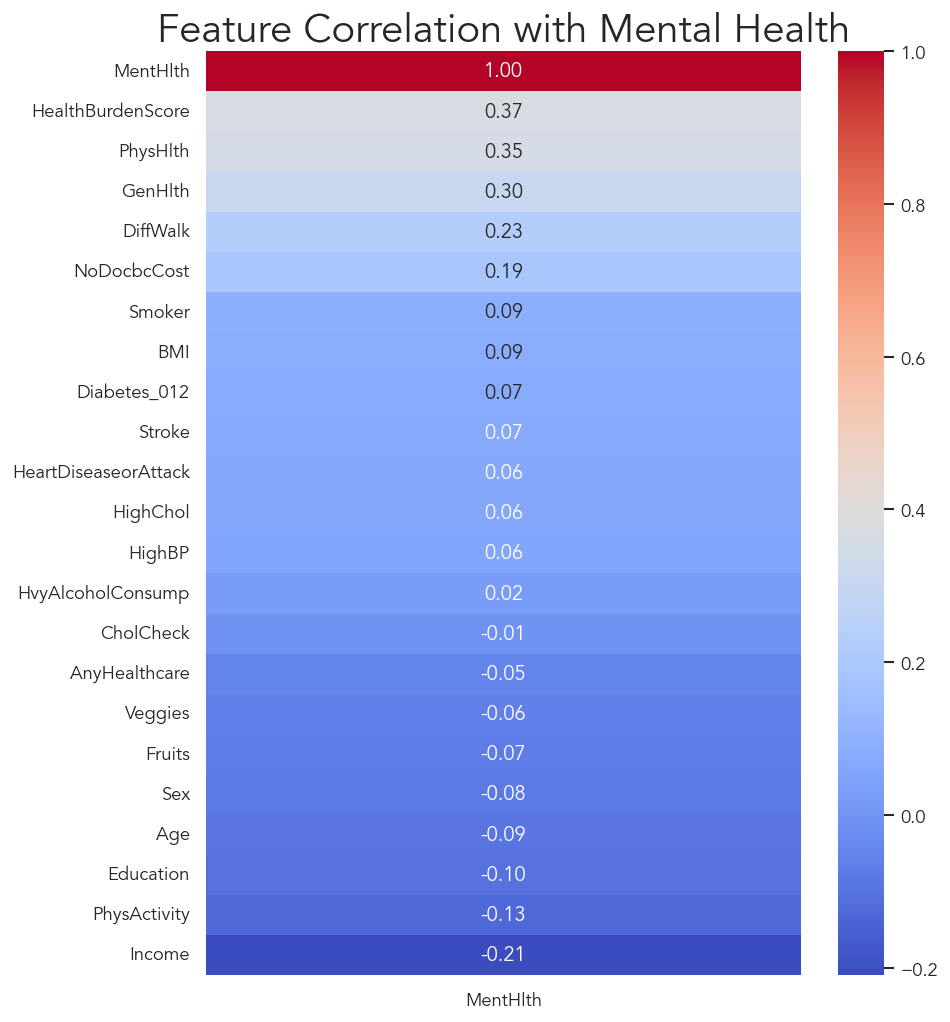

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you're only using numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Correlation matrix including only numeric columns and 'MentHlth'
corr_matrix = df[numeric_cols].corr()

# Focus on the correlation of other variables with 'MentHlth'
menthlth_corr = corr_matrix[['MentHlth']].sort_values(by='MentHlth', ascending=False)

# Create the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(menthlth_corr, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Feature Correlation with Mental Health")
plt.tightfit
plt.savefig('heatmap.png', transparent=True)  
plt.show()

## Correlation Heatmap  

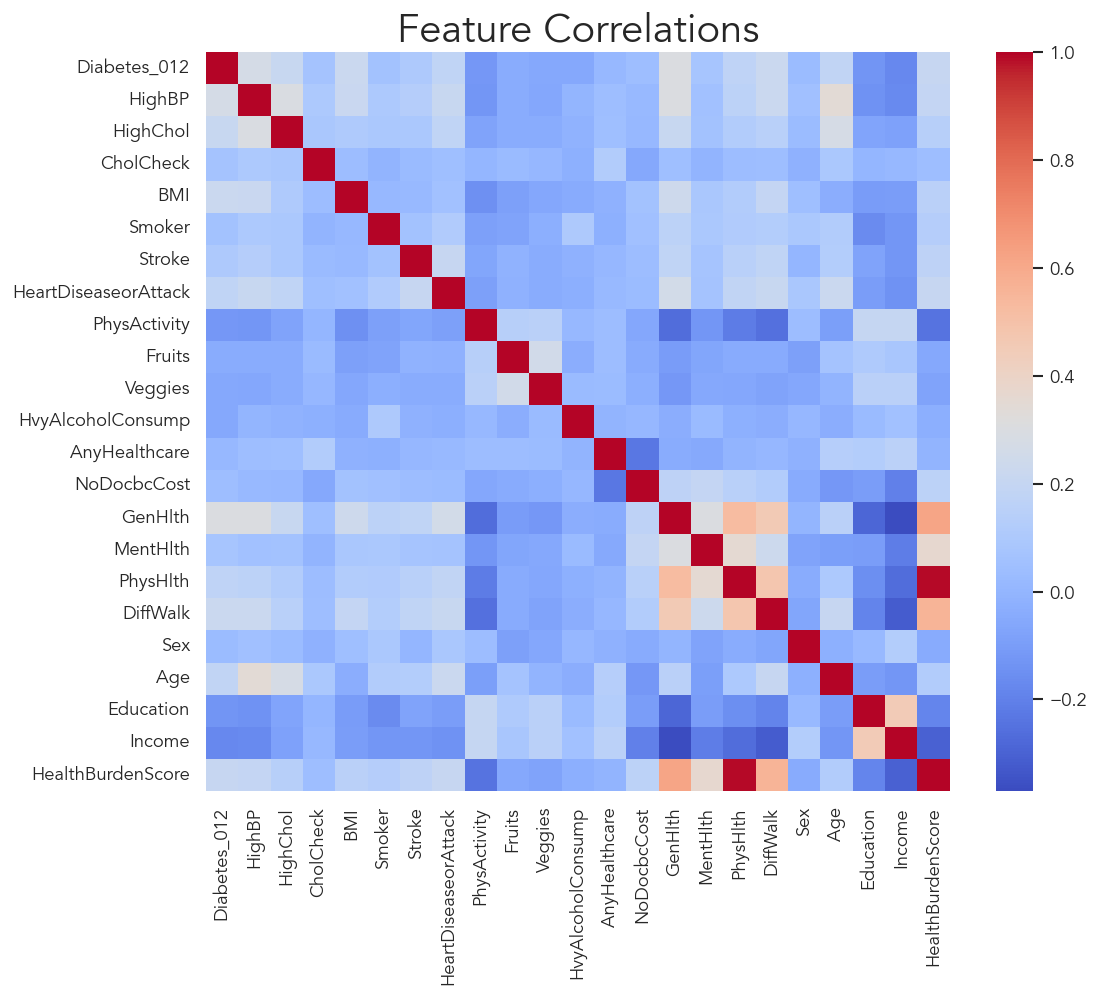

In [157]:
numeric_cols = df.select_dtypes(include=['number']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))  # Optional: Adjust size to fit all labels
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title("Feature Correlations")
plt.show()

In [131]:
# Calculate correlation matrix for all numeric columns, including 'MentHlth'
corr_matrix = df[numeric_cols].corr()

# Print the correlation values with 'MentHlth'
print("Correlation of variables with Mental Health (MentHlth):")
print(corr_matrix['MentHlth'].sort_values(ascending=False))

Correlation of variables with Mental Health (MentHlth):
MentHlth                1.000000
HealthBurdenScore       0.368379
PhysHlth                0.353619
GenHlth                 0.301674
DiffWalk                0.233688
NoDocbcCost             0.192107
Smoker                  0.092196
BMI                     0.085310
Diabetes_012            0.074971
Stroke                  0.070172
HeartDiseaseorAttack    0.064621
HighChol                0.062069
HighBP                  0.056456
HvyAlcoholConsump       0.024716
CholCheck              -0.008366
AnyHealthcare          -0.052707
Veggies                -0.058884
Fruits                 -0.068217
Sex                    -0.080705
Age                    -0.092068
Education              -0.101830
PhysActivity           -0.125587
Income                 -0.209806
Name: MentHlth, dtype: float64


## Statistical Summary

In [133]:
# Group by the diabetes category and calculate the average health statistics
diabetes_group = df.groupby('Diabetes_012')[['PhysHlth', 'GenHlth', 'MentHlth']].agg(['mean', 'count'])

# Print out the average health statistics and counts
print(diabetes_group)

              PhysHlth           GenHlth          MentHlth        
                  mean   count      mean   count      mean   count
Diabetes_012                                                      
0             3.582416  213703  2.372391  213703  2.944404  213703
1             7.768417   39977  3.254446   39977  4.469695   39977


## `Conclusion`: 
- 18% of people are prediabetic or diabetic (~ 40k/~ 213k)


`physical health`
- the number of poor phys. days doubles when you have [pre]diabetes (avg. of 3 to 6 v 7)
  
`general health`
- prediabetics and people without diabetes both report "very good" (2) general health on a scale from 5-poor to 1-excellent
- on avg. diabetics report "good" health (3)
  
`mental health`
- people without diabetes report 2 poor mental health days in last month
- people with prediabetes and diabetes report 4 poor mental health days in last month

## Diabetes Categories & Mental Health Days - Bar Graph

Diabetes_012
0    2.944404
1    4.469695
Name: MentHlth, dtype: float64


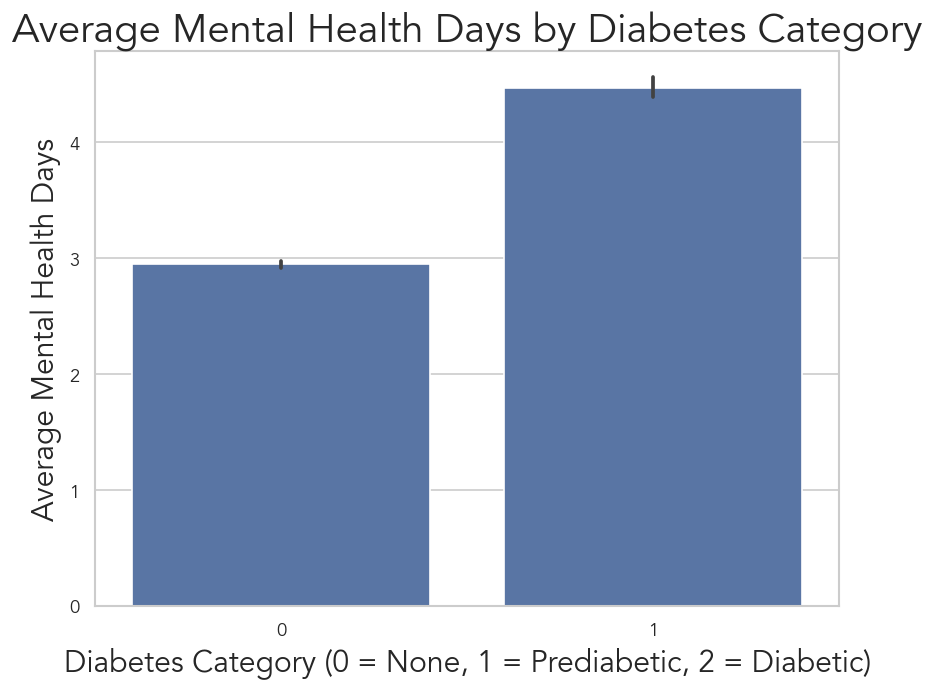

In [117]:
# Group by Diabetes categories and calculate average Mental Health Days
avg_mental_health_days = df.groupby('Diabetes_012')['MentHlth'].mean()
print(avg_mental_health_days)

# Visualization
sns.barplot(x='Diabetes_012', y='MentHlth', data=df)
plt.title('Average Mental Health Days by Diabetes Category')
plt.xlabel('Diabetes Category (0 = None, 1 = Prediabetic, 2 = Diabetic)')
plt.ylabel('Average Mental Health Days')
plt.show()


# Modeling

Notes: 

- try the regression first, given that it's a regression problem 
- models without scaling 
- then classification modeling to compare whether bining may be better 

## X, y and train_test_split()

In [47]:
X = df.drop("MentHlth", axis=1)
y = df["MentHlth"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

## Preprocessing

In [49]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, roc_curve

## Regression Modeling

### No Scaling: Four Models

In [58]:
# Function to calculate metrics
def calculate_metrics(model, X_train, y_train):
    y_train_pred = model.predict(X_train)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    n, p = X_train.shape
    adjusted_r2 = 1 - ((1 - train_r2) * (n - 1) / (n - p - 1))
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    return {
        "R2": train_r2,
        "Adjusted R2": adjusted_r2,
        "MAE": train_mae,
        "RMSE": train_rmse
    }

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_metrics = calculate_metrics(rf_model, X_train, y_train)
print("Random Forest Results:", rf_metrics)

Training Random Forest...
Random Forest Results: {'R2': 0.8568761029443226, 'Adjusted R2': 0.8568603037778145, 'MAE': 1.6804358921095965, 'RMSE': 2.8110644586254097}


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
from sklearn.linear_model import LinearRegression, Ridge

# Linear Regression
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_metrics = calculate_metrics(lr_model, X_train, y_train)
print("Linear Regression Results:", lr_metrics)


Training Linear Regression...
Linear Regression Results: {'R2': 0.1919024104518079, 'Adjusted R2': 0.19181320614257147, 'MAE': 4.034636534115951, 'RMSE': 6.6795412072514315}


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
# Ridge Regression
print("\nTraining Ridge Regression...")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_metrics = calculate_metrics(ridge_model, X_train, y_train)
print("Ridge Regression Results:", ridge_metrics)


Training Ridge Regression...
Ridge Regression Results: {'R2': 0.19190241039197853, 'Adjusted R2': 0.19181320608273544, 'MAE': 4.034636171344349, 'RMSE': 6.6795412074986995}


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
# K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

print("\nTraining K-Nearest Neighbors Regressor...")
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')  # You can adjust n_neighbors, weights, and algorithm
knn_model.fit(X_train, y_train)

knn_metrics = calculate_metrics(knn_model, X_train, y_train)
print("K-Nearest Neighbors Regressor Results:", knn_metrics)


Training K-Nearest Neighbors Regressor...
K-Nearest Neighbors Regressor Results: {'R2': 0.3758006788673023, 'Adjusted R2': 0.3757317747275206, 'MAE': 3.2260590770524553, 'RMSE': 5.870517320905636}


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Metrics

`Results`: A Random Forest Model predicts 85% of the variance in our data (Adj. R = .85) with a low mean absolute error (1,67) unlike Linear and Ridge with R2 values around .18 and MAE's around 4.   

`Random Forest`:  {'R2': 0.8561615495867143, 
                    'Adjusted R2': 0.8561466640274419, 
                    'MAE': 1.672492248684206, 
                    'RMSE': 2.8113681968863866}

`Linear Regression`: {'R2': 0.19459159468000387, 
                        'Adjusted R2': 0.19450824454294768, 
                        'MAE': 4.01374637440786, 
                        'RMSE': 6.65255247000325}

`Ridge Regression`: {'R2': 0.19459159462544262, 
                        'Adjusted R2': 0.19450824448838067, 
                        'MAE': 4.013746008833455, 
                        'RMSE': 6.652552470228583}

### Scaling: 

`Conclusion`: Not Necessary given that the algorithm, based on decision trees, is INSENSITIVE to feature scaling. Trees split on feature values directly. 

### GridSearchCV

In [149]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

NameError: name 'pipe' is not defined

## Classification Modeling

In [85]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

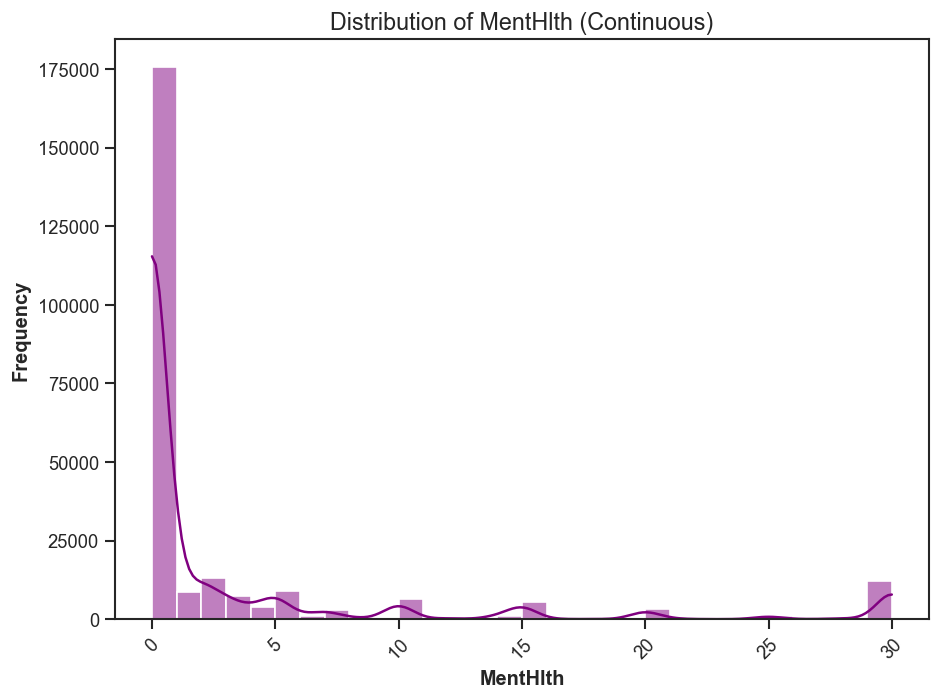

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot (no grid)
sns.set(style="ticks")

# Create the figure and plot
data_column = "MentHlth"
plt.figure(figsize=(8, 6))

# Check if the column is categorical or continuous
if df[data_column].nunique() <= 10:  # Categorical
    sns.countplot(x=data_column, data=df, color="purple")
    plt.title(f'Distribution of {data_column} (Categorical)', fontsize=14)
    plt.ylabel('Count', fontsize=12)
else:  # Continuous
    sns.histplot(df[data_column], kde=True, bins=30, color="purple")
    plt.title(f'Distribution of {data_column} (Continuous)', fontsize=14)
    plt.ylabel('Frequency', fontsize=12)

# Set common labels and layout adjustments
plt.xlabel(data_column, fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
